In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
def housing_data_reader(filename='./data/housing_price.csv'):
    data = pd.read_csv(filename)
    X = data.drop(['MEDV'],axis = 1)
    y =  data['MEDV']
    return X, y

def h1n1_data_reader(filename='./data/process_data.csv'):
    data = pd.read_csv(filename)
    X = data.drop(['h1n1_vaccine','respondent_id','seasonal_vaccine'],axis = 1)
    y =  data['h1n1_vaccine']
    return X, y

### Define the characteristic function

In [2]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import r2_score
# define the characteristic function
def classification_kpi(G,S):
    """_summary_

    Args:
        G (nx.Graph): _description_
        S (list): list of nodes (list of columns)
    """
    cols = list(S)
    if len(cols) == 0:
        return 0
    else:
        X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size=0.2, random_state=42)
        lgb_model = lgb.LGBMRegressor(learning_rate=0.3, verbosity=-1)

        lgb_model.fit(X_train,y_train)
        lgb_pred = lgb_model.predict(X_test)
        r2 = r2_score(y_test, lgb_pred)
        return r2

In [3]:
import seaborn as sns
import networkx as nx

# plot the networkx graph for W and W_new
def plot_graph(W, file_name=None):
    """_summary_

    Args:
        W (pd.DataFrame): weight matrix
    """
    G = nx.Graph(W)
    plt.figure(figsize=(5, 5))
    nx.draw_shell(G, with_labels=True)
    if file_name is not None:
        plt.savefig(file_name, format='eps', dpi=300)
    plt.show()

### Import shapG, some necessary libraries and explain the model

In [4]:
# import shapG and necessary libraries
import networkx as nx
import seaborn
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr,kendalltau,spearmanr
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('.'), '..')))
import shapG.shapley as shapley
import shapG.plot as shapGplot
from shapG.utils import corr_generator, create_minimal_edge_graph, matrix_generator, kl, kl_mi_matrix


In [5]:
# explain the model
X, y = housing_data_reader('./data/housing_price.csv')
W = matrix_generator(X, pearsonr)
A, W_new = create_minimal_edge_graph(W, reverse=True, version='v3')
G = nx.Graph(A)

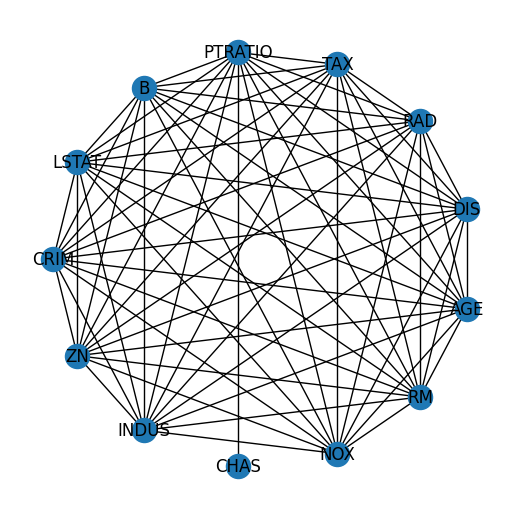

In [6]:
plot_graph(W_new, file_name=None)

In [7]:
shapley_value = shapley.shapG(G, m=8, f=classification_kpi, approximate_by_ratio=False, verbose=True)


Computing Shapley approximations: 100%|██████████| 13/13 [04:45<00:00, 21.97s/it]

[('CRIM',), ('CRIM', 'RAD'), ('CRIM', 'ZN'), ('CRIM', 'TAX'), ('AGE', 'CRIM'), ('B', 'CRIM'), ('CRIM', 'INDUS'), ('CRIM', 'PTRATIO'), ('CRIM', 'NOX'), ('CRIM', 'RAD', 'ZN'), ('CRIM', 'RAD', 'TAX'), ('AGE', 'CRIM', 'RAD'), ('B', 'CRIM', 'RAD'), ('CRIM', 'INDUS', 'RAD'), ('CRIM', 'PTRATIO', 'RAD'), ('CRIM', 'NOX', 'RAD'), ('CRIM', 'TAX', 'ZN'), ('AGE', 'CRIM', 'ZN'), ('B', 'CRIM', 'ZN'), ('CRIM', 'INDUS', 'ZN'), ('CRIM', 'PTRATIO', 'ZN'), ('CRIM', 'NOX', 'ZN'), ('AGE', 'CRIM', 'TAX'), ('B', 'CRIM', 'TAX'), ('CRIM', 'INDUS', 'TAX'), ('CRIM', 'PTRATIO', 'TAX'), ('CRIM', 'NOX', 'TAX'), ('AGE', 'B', 'CRIM'), ('AGE', 'CRIM', 'INDUS'), ('AGE', 'CRIM', 'PTRATIO'), ('AGE', 'CRIM', 'NOX'), ('B', 'CRIM', 'INDUS'), ('B', 'CRIM', 'PTRATIO'), ('B', 'CRIM', 'NOX'), ('CRIM', 'INDUS', 'PTRATIO'), ('CRIM', 'INDUS', 'NOX'), ('CRIM', 'NOX', 'PTRATIO'), ('CRIM', 'RAD', 'TAX', 'ZN'), ('AGE', 'CRIM', 'RAD', 'ZN'), ('B', 'CRIM', 'RAD', 'ZN'), ('CRIM', 'INDUS', 'RAD', 'ZN'), ('CRIM', 'PTRATIO', 'RAD', 'ZN'), ('

In [9]:
import pickle
with open(r'C:\Users\admin\Desktop\master_ai\master\shapG-master\shapG\shapG_subsets.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

In [10]:
loaded_data

[('CRIM',),
 ('CRIM', 'RAD'),
 ('CRIM', 'ZN'),
 ('CRIM', 'TAX'),
 ('AGE', 'CRIM'),
 ('B', 'CRIM'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RAD', 'ZN'),
 ('CRIM', 'RAD', 'TAX'),
 ('AGE', 'CRIM', 'RAD'),
 ('B', 'CRIM', 'RAD'),
 ('CRIM', 'INDUS', 'RAD'),
 ('CRIM', 'PTRATIO', 'RAD'),
 ('CRIM', 'NOX', 'RAD'),
 ('CRIM', 'TAX', 'ZN'),
 ('AGE', 'CRIM', 'ZN'),
 ('B', 'CRIM', 'ZN'),
 ('CRIM', 'INDUS', 'ZN'),
 ('CRIM', 'PTRATIO', 'ZN'),
 ('CRIM', 'NOX', 'ZN'),
 ('AGE', 'CRIM', 'TAX'),
 ('B', 'CRIM', 'TAX'),
 ('CRIM', 'INDUS', 'TAX'),
 ('CRIM', 'PTRATIO', 'TAX'),
 ('CRIM', 'NOX', 'TAX'),
 ('AGE', 'B', 'CRIM'),
 ('AGE', 'CRIM', 'INDUS'),
 ('AGE', 'CRIM', 'PTRATIO'),
 ('AGE', 'CRIM', 'NOX'),
 ('B', 'CRIM', 'INDUS'),
 ('B', 'CRIM', 'PTRATIO'),
 ('B', 'CRIM', 'NOX'),
 ('CRIM', 'INDUS', 'PTRATIO'),
 ('CRIM', 'INDUS', 'NOX'),
 ('CRIM', 'NOX', 'PTRATIO'),
 ('CRIM', 'RAD', 'TAX', 'ZN'),
 ('AGE', 'CRIM', 'RAD', 'ZN'),
 ('B', 'CRIM', 'RAD', 'ZN'),
 ('CRIM', 'INDUS', 'RAD', 'ZN

In [11]:
len(loaded_data)

18690

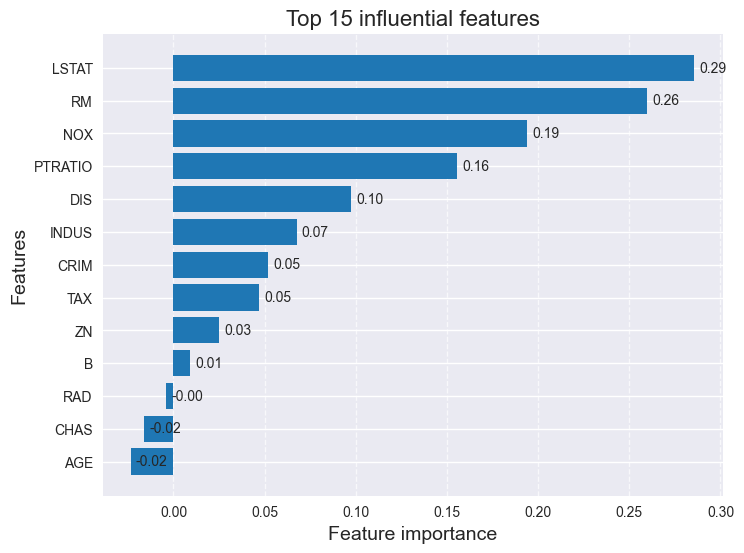

In [12]:

fig, ax = shapGplot(shapley_value, top_n=15, show_plot=False)
ax.set_xlabel("Feature importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Top 15 influential features', fontsize=16)
plt.show()

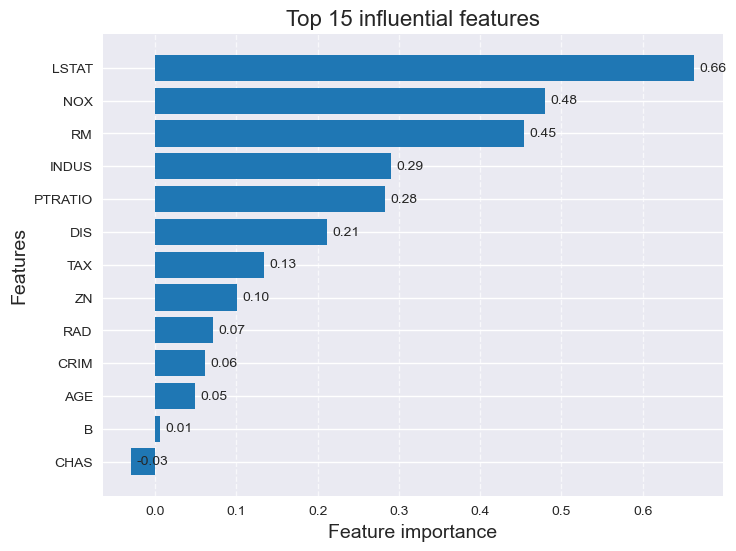

In [5]:
# explain the model
W2 = kl_mi_matrix(X, y)
A2, W2_new = create_minimal_edge_graph(W, reverse=True, version='v3')
G2 = nx.Graph(A2)
shapley_value2 = shapley.shapG(G2, m=3, f=classification_kpi, approximate_by_ratio=False)
fig, ax = shapGplot(shapley_value2, top_n=15, show_plot=False)
ax.set_xlabel("Feature importance", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Top 15 influential features', fontsize=16)
plt.show()

### Some useful code snippet for draw the figure

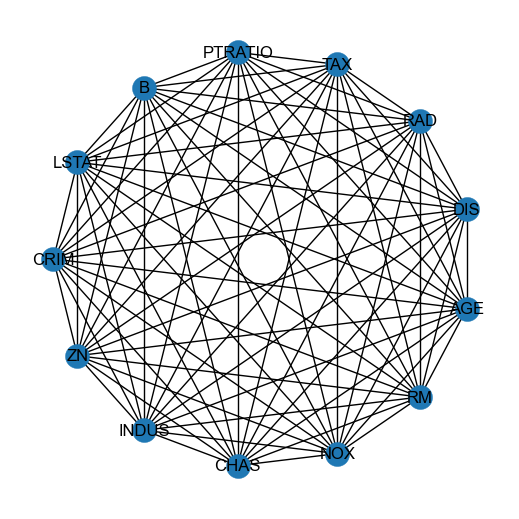

In [7]:
plot_graph(W, file_name=None)

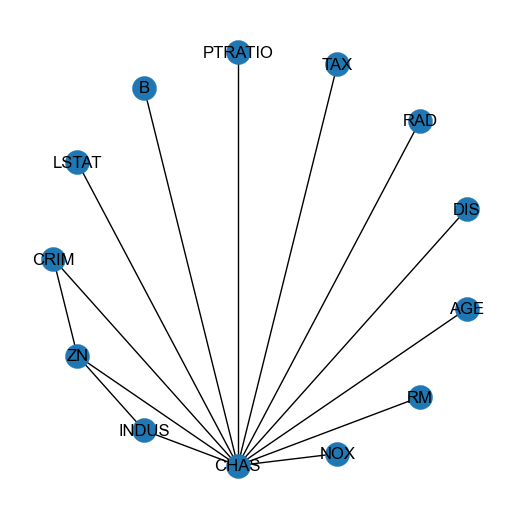

In [8]:
plot_graph(W_new, file_name=None)

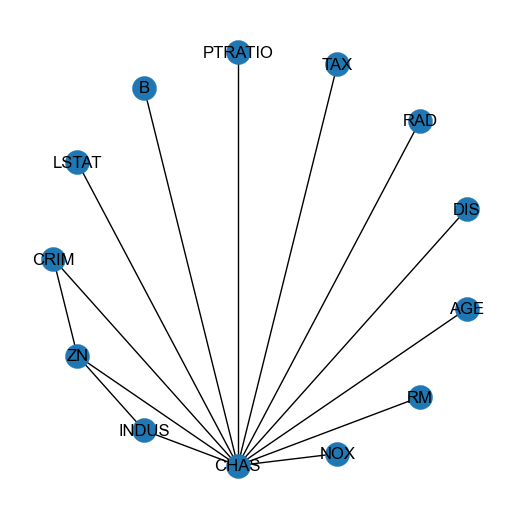

In [9]:
plot_graph(W2_new, file_name=None)

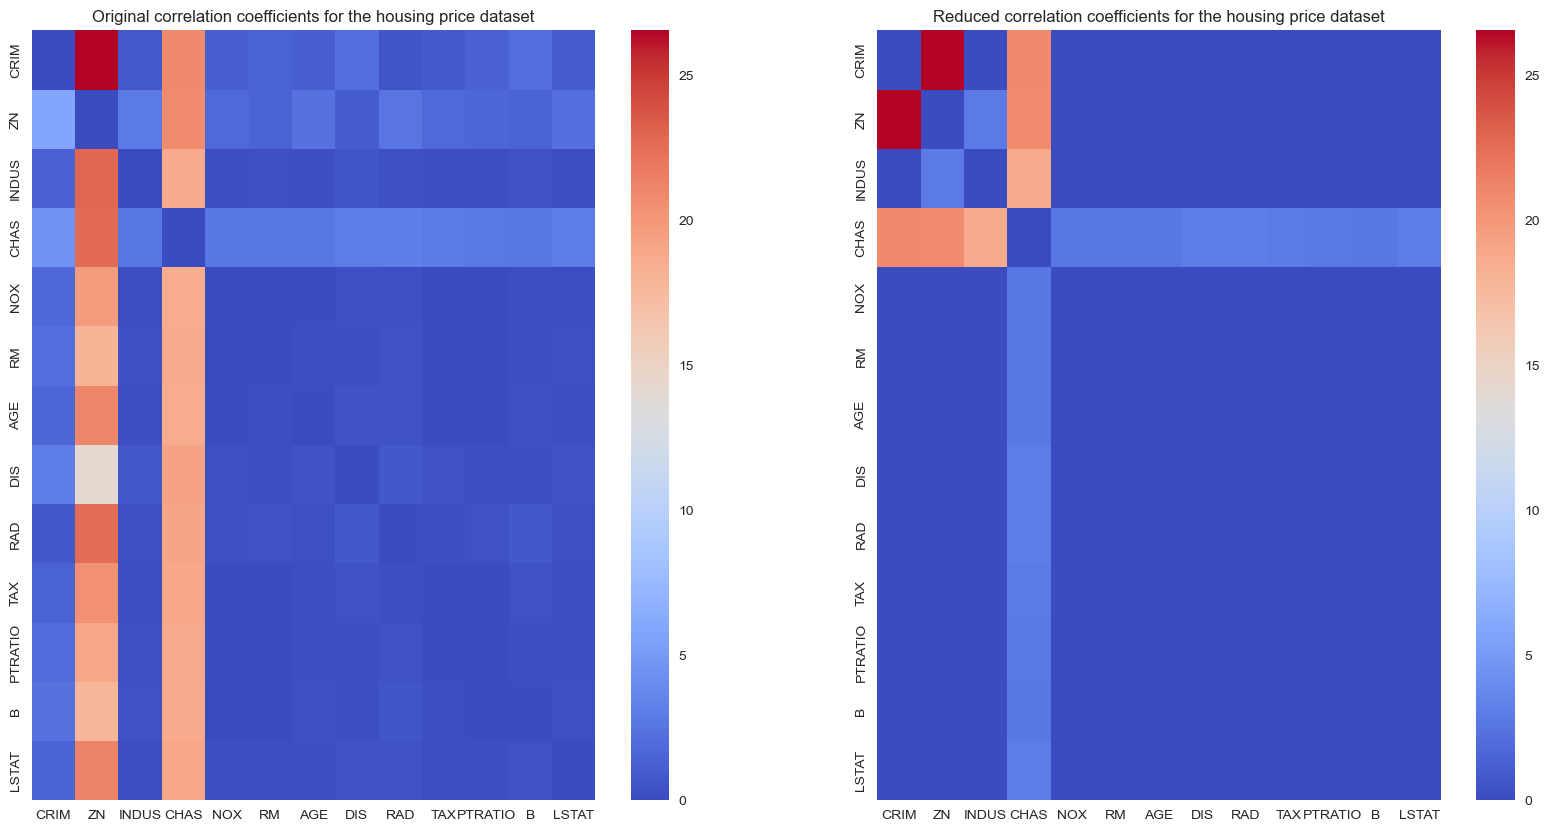

In [10]:
# create two heatmaps for W and W_new
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(W, annot=False, cmap='coolwarm', cbar=True)
plt.title('Original correlation coefficients for the housing price dataset')
plt.subplot(1, 2, 2)
sns.heatmap(W_new, annot=False, cmap='coolwarm', cbar=True)
plt.title('Reduced correlation coefficients for the housing price dataset')
# plt.savefig('housing-heatmap.eps', format='eps', dpi=300)

plt.show()